# Trafic Sign Using LE-NET Architecture:


- The dataset contains 43 different classes of images. 
- Classes are as listed below: 

    - ( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')
    - ( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')
    - ( 4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')
    - ( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')
    - ( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
    - (10, b'No passing for vehicles over 3.5 metric tons')
    - (11, b'Right-of-way at the next intersection') (12, b'Priority road')
    - (13, b'Yield') (14, b'Stop') (15, b'No vehicles')
    - (16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
    - (18, b'General caution') (19, b'Dangerous curve to the left')
    - (20, b'Dangerous curve to the right') (21, b'Double curve')
    - (22, b'Bumpy road') (23, b'Slippery road')
    - (24, b'Road narrows on the right') (25, b'Road work')
    - (26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
    - (29, b'Bicycles crossing') (30, b'Beware of ice/snow')
    - (31, b'Wild animals crossing')
    - (32, b'End of all speed and passing limits') (33, b'Turn right ahead')
    - (34, b'Turn left ahead') (35, b'Ahead only') (36, b'Go straight or right')
    - (37, b'Go straight or left') (38, b'Keep right') (39, b'Keep left')
    - (40, b'Roundabout mandatory') (41, b'End of no passing')
    - (42, b'End of no passing by vehicles over 3.5 metric tons')




Warning messages are normally written to sys.stderr , but their disposition can be changed flexibly, from ignoring all warnings to turning them into exceptions.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import random
import pickle
import seaborn as sns


The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
Also called marshalling or flattening.

In [3]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [4]:
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


In [5]:
X_train.shape

(34799, 32, 32, 3)

In [6]:
y_train.shape

(34799,)

In [7]:
X_valid.shape

(4410, 32, 32, 3)

In [8]:
y_valid.shape

(4410,)

In [9]:
X_test.shape

(12630, 32, 32, 3)

In [10]:
y_test.shape

(12630,)

### Image:

36

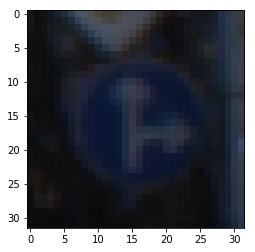

In [11]:
i = 1006
plt.imshow(X_train[i]) 
y_train[i]

###  Data Preparation:

In [12]:
# Shuffle the dataset
# By shuffling your data, you ensure that each data point creates an "independent" change on the model, 
# without being biased by the same points before them
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)


In [13]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)
X_valid_gray  = np.sum(X_valid/3, axis=3, keepdims=True) 

In [14]:
X_train_gray_norm = (X_train_gray - 128)/128 
X_test_gray_norm = (X_test_gray - 128)/128
X_valid_gray_norm = (X_valid_gray - 128)/128


In [15]:
X_train_gray.shape

(34799, 32, 32, 1)

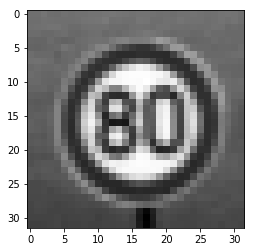

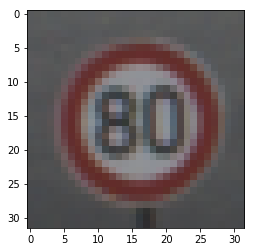

In [16]:
i =599
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])


### Training:

In [17]:
# import keras

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split


Using TensorFlow backend.


In [18]:
image_shape = X_train_gray[i].shape

In [19]:
image_shape

(32, 32, 1)

In [20]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units=120, activation='relu'))

cnn_model.add(Dense(units=84, activation='relu'))

cnn_model.add(Dense(units=43, activation = 'softmax'))


In [21]:
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_1 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_2 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_2 (Dense)              (None, 84)                10164     
__________

In [22]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [23]:
hist = cnn_model.fit(X_train_gray_norm,
                        y_train,
                        batch_size=500,
                        nb_epoch=50,
                        verbose=1,
                        validation_data = (X_valid_gray_norm,y_valid))

Train on 34799 samples, validate on 4410 samples
Epoch 1/50
34799/34799 [==============================] - 22s 618us/step - loss: 3.1977 - acc: 0.1656 - val_loss: 2.7544 - val_acc: 0.2871
Epoch 2/50
34799/34799 [==============================] - 21s 590us/step - loss: 1.7323 - acc: 0.5126 - val_loss: 1.6217 - val_acc: 0.5512
Epoch 3/50
34799/34799 [==============================] - 21s 597us/step - loss: 1.0418 - acc: 0.6939 - val_loss: 1.2171 - val_acc: 0.6490
Epoch 4/50
34799/34799 [==============================] - 21s 596us/step - loss: 0.7547 - acc: 0.7842 - val_loss: 1.0345 - val_acc: 0.7113
Epoch 5/50
34799/34799 [==============================] - 21s 597us/step - loss: 0.6115 - acc: 0.8248 - val_loss: 0.9654 - val_acc: 0.7209
Epoch 6/50
34799/34799 [==============================] - 21s 595us/step - loss: 0.4998 - acc: 0.8595 - val_loss: 0.8731 - val_acc: 0.7617
Epoch 7/50
34799/34799 [==============================] - 21s 597us/step - loss: 0.4250 - acc: 0.8822 - val_loss: 0.8

## Evaluation:

In [24]:
score = cnn_model.evaluate(X_test_gray_norm, y_test,verbose=0)
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.8439


In [25]:
hist.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

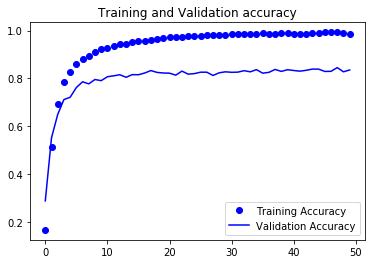

In [26]:
accuracy = hist.history['acc']
val_accuracy = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()


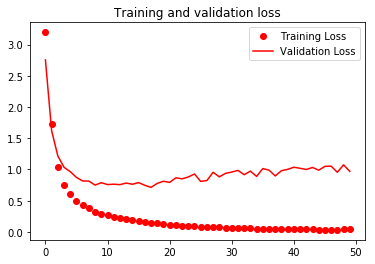

In [27]:
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [28]:
#get the predictions for the test data
pred_classes = cnn_model.predict_classes(X_test_gray_norm)
#get the indices to be plotted
y_true = y_test


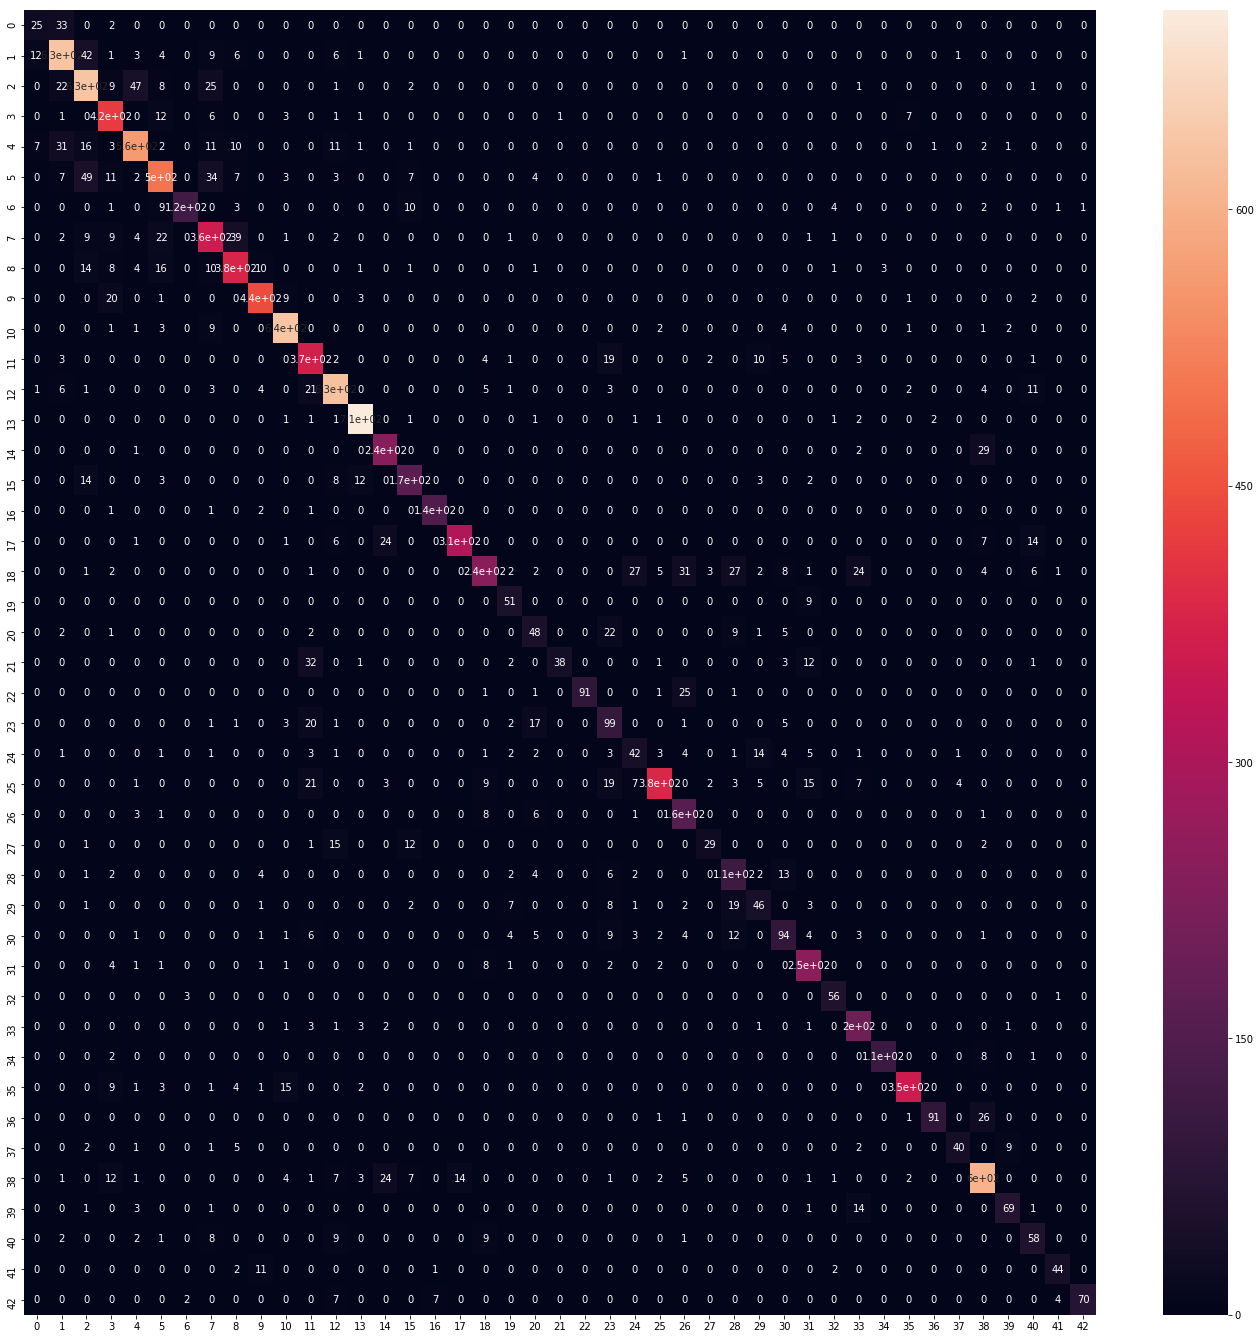

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, pred_classes)
plt.figure(figsize = (24,24))
sns.heatmap(cm, annot=True)

In [31]:
# Accuracy Score
from sklearn.metrics import accuracy_score
accuracy_score(y_true, pred_classes)


0.8439429928741092

## Great!!

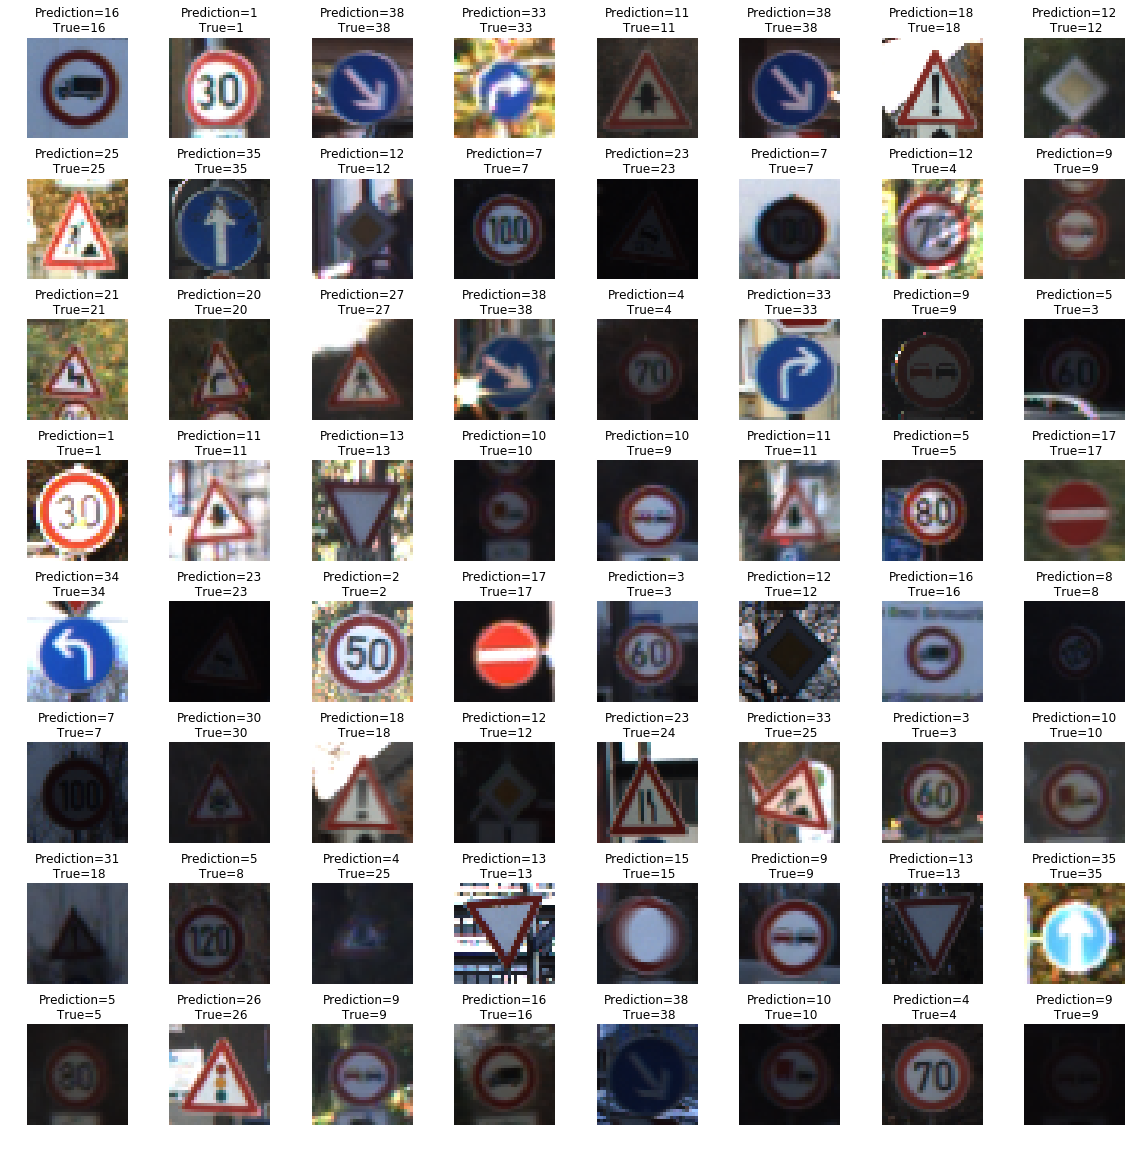

In [32]:
# Prediction in visualization Form
L = 8
W = 8
fig, axes = plt.subplots(L, W, figsize = (20,20))
axes = axes.ravel() 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction={}\n True={}".format(pred_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)
# plt.subplots_adjust(wspace=1)